 #  6.2 Exploring Relationships

# I decided to narrow down the number of countries to
# the Top 20 countries in terms of total cases in order to
# focus on the different reasons these countries have had
# the most trouble controlling the virus, how the death rates
# stack up against each other, and how it compares to other
# regions and others countries in their same region.

# 1. Importing Visualization Libraries and Data

In [4]:
# Importing Visualization Libraries and Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
matplotlib.__version__

'3.2.2'

In [6]:
# Ensuring the charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# Define path

path = '/Users/seanward/Desktop/6- Achievement'

In [8]:
# Importing data

df_covid2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'full_grouped_edit2.csv'))

In [9]:
# Importing data

df_top = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'top_20_cases.csv'))

# 2. Merging two data sets

In [10]:
df_top.dtypes

Country/Region               object
Continent                    object
Population                    int64
TotalCases                    int64
TotalDeaths                   int64
WHO Region                   object
% of Cases                   object
% of Cases that Die          object
% of Population that Dies    object
dtype: object

In [11]:
# Renaming columns for clarity purposes

df_top.rename(columns = { 'TotalCases' : 'Total Cases', 'TotalDeaths' : 'Total Deaths' }, inplace = True)

In [12]:
df_covid2.dtypes

Date              object
Country/Region    object
Confirmed          int64
Deaths             int64
Recovered          int64
Active             int64
New cases          int64
New deaths         int64
New recovered      int64
WHO Region        object
dtype: object

In [13]:
# Dropping columns that are not needed.

df_covid2 = df_covid2.drop(columns = ['New cases'])

In [14]:
df_covid2 = df_covid2.drop(columns = ['New deaths'])

In [15]:
df_covid2 = df_covid2.drop(columns = ['New recovered'])

In [16]:
df_covid2 = df_covid2.drop(columns = ['Recovered'])

In [17]:
df_covid2 = df_covid2.drop(columns = ['Active'])

In [18]:
df_covid2.dtypes

Date              object
Country/Region    object
Confirmed          int64
Deaths             int64
WHO Region        object
dtype: object

In [19]:
df_merged = df_covid2.merge(df_top, on = 'Country/Region', indicator = True)

In [20]:
df_merged.dtypes

Date                           object
Country/Region                 object
Confirmed                       int64
Deaths                          int64
WHO Region_x                   object
Continent                      object
Population                      int64
Total Cases                     int64
Total Deaths                    int64
WHO Region_y                   object
% of Cases                     object
% of Cases that Die            object
% of Population that Dies      object
_merge                       category
dtype: object

In [21]:
# Dropping columns that are not needed.

df_merged = df_merged.drop(columns = ['WHO Region_y'])

In [22]:
df_merged = df_merged.drop(columns = ['Continent'])

In [23]:
df_merged['_merge'].value_counts(dropna = False)

both          3078
right_only       0
left_only        0
Name: _merge, dtype: int64

# 3. Creating Correlation Heatmap (Question 3)

In [24]:
# Question 3: Create a correlation matrix using pandas

df_merged.corr()

,Confirmed,Deaths,Population,Total Cases,Total Deaths
Confirmed,1.000000,0.902685,0.117746,0.566541,0.558700
Deaths,0.902685,1.000000,0.041555,0.498254,0.595372
Population,0.117746,0.041555,1.000000,0.428998,0.245816
Total Cases,0.566541,0.498254,0.428998,1.000000,0.920425
Total Deaths,0.558700,0.595372,0.245816,0.920425,1.000000


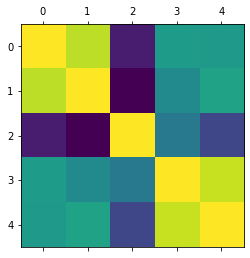

In [25]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_merged.corr())
plt.show()

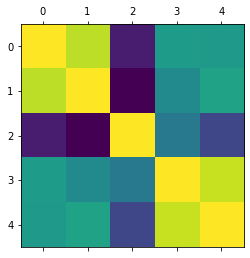

In [26]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_merged.corr())
plt.show()

Text(0.5, 1.05, 'Correlation Matrix')

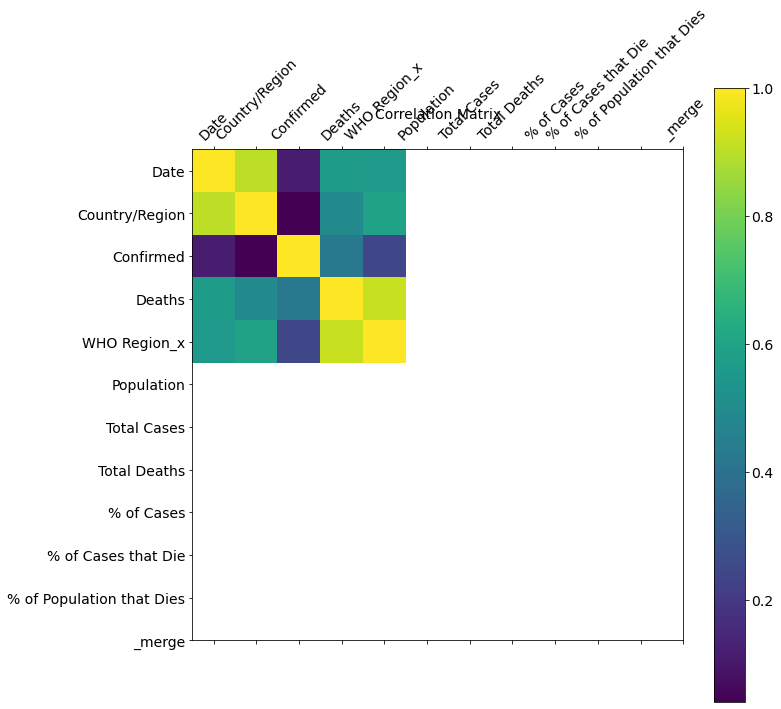

In [27]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(11, 11)) # figure size 
plt.matshow(df_merged.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_merged.shape[1]), df_merged.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_merged.shape[1]), df_merged.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [28]:
df_merged.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'WHO Region_x',
       'Population', 'Total Cases', 'Total Deaths', '% of Cases',
       '% of Cases that Die', '% of Population that Dies', '_merge'],
      dtype='object')

In [29]:
# Create a subset excluding the  "Date" and "Country/Region" columns

sub = df_merged[[ 'Confirmed', 'Deaths', 'Population', 'Total Cases', 'Total Deaths']]

In [30]:
sub

,Confirmed,Deaths,Population,Total Cases,Total Deaths
0,1,0,331198130,5032179,162804
1,1,0,331198130,5032179,162804
2,2,0,331198130,5032179,162804
3,2,0,331198130,5032179,162804
4,5,0,331198130,5032179,162804
...,...,...,...,...,...
3073,215940,5419,84428331,237265,5798
3074,216873,5440,84428331,237265,5798
3075,217799,5458,84428331,237265,5798
3076,218717,5475,84428331,237265,5798


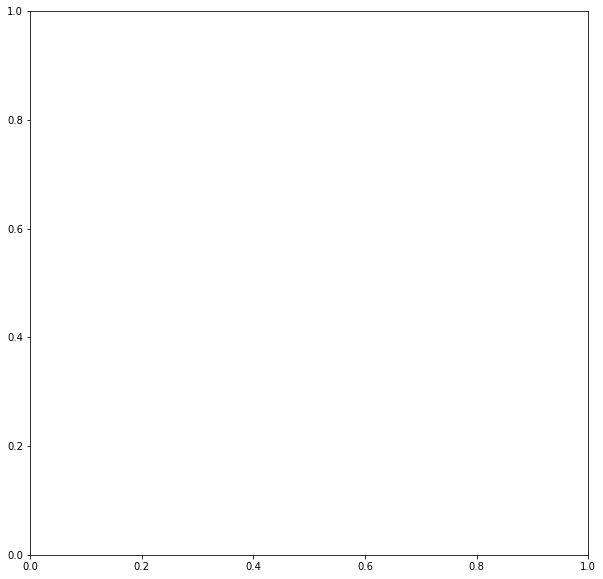

In [31]:
# Create a subplot with matplotlib. Creating an empty output, to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [32]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 



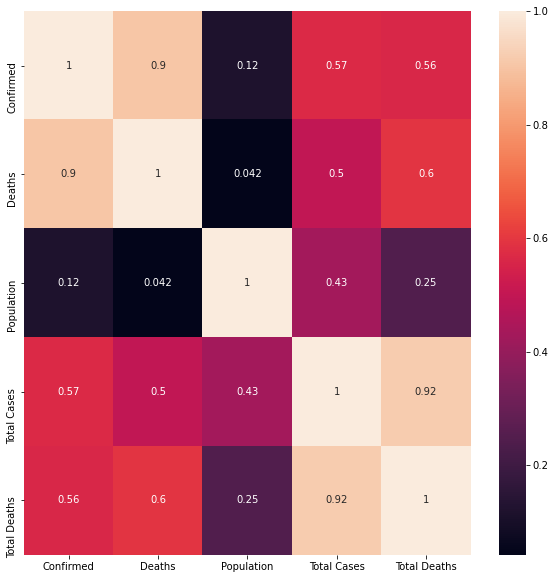

In [33]:
corr.figure

In [34]:
# Question 3 answer: There is a very strong correlation between Deaths and Confirmed (0.9) and Total Deaths and
# Total Cases (0.92) which is not surprising since they are both a comparison of Deaths and Cases (the first being
# day to day and the second being grand total).  There is far less correlation between all the other variables
# due to the differences between day to day numbers and the total numbers for almost an entire year (Total).



# Scatterplot

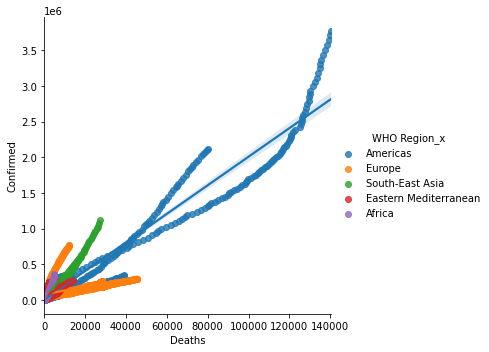

In [35]:
# Question 4 Create a scatterplot for the "Deaths" and "Confirmed" columns in seaborn

sns.lmplot(x = 'Deaths', y = 'Confirmed', hue = 'WHO Region_x', data = df_merged)

In [36]:
# Question 4 answer: Overall, it is shown that when there are more confirmed cases, there are more deaths.
# These charts are only showing the Top 20 Countries in terms of amount of confirmed cases, so I can tell
# that the highest blue line is the United States (showing a higher rate of confirmed cases than deaths perhaps
# due to the large amount of testing, and different levels of lockdown/mask mandates throughout the states)
# I also see in orange is Europe which has a country (or countries) with a very high death rate all the way on the 
# left, and a country (or countries) with a very low death rate but many more cases (on the bottom).
# South-East Asia in green and Africa in purple also has a very high death rate which implies that there may be many more cases
# out there that are going undetected (not enough testing perhaps?).  

# Pair Plots

In [37]:
# Question 5: Keeping only the variables I want to use in the pair plot

sub_2 = sub[['Confirmed', 'Deaths', 'Total Cases', 'Total Deaths']]

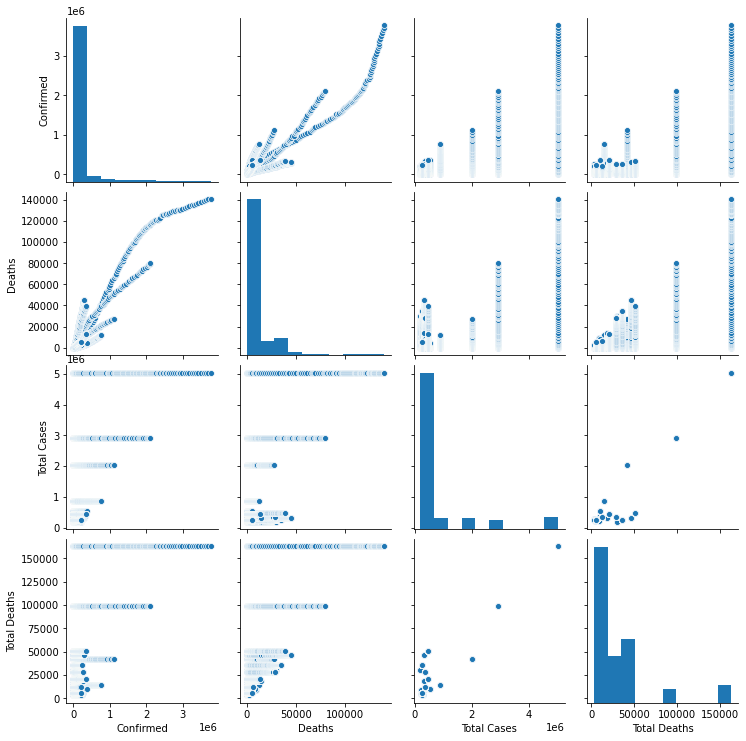

In [38]:
# Create a pair plot 

g = sns.pairplot(sub_2)

In [39]:
# Question 5 answer: I definitely feel that the comparison between Deaths and Confirmed
# along with the comparison between Total Cases and Total Deaths is the most interesting.
# There are various trend lines, and one can see that some countries has disproportionally
# many more deaths per confirmed case when the case number is lower.  The United States
# seems to have a lower death rate as compared to amount of cases with the trend line
# straightening out to show many more cases (or shooting up to show less deaths).

# Categorical Plot

# Question 6, Creating a categorical plot.  Using the mean death count of each country to determine the flag.


In [40]:
df_merged['Cases Death Rate'] = df_merged['Deaths']/df_merged['Confirmed']

In [41]:
df_merged['Country Cases Death Rate'] = df_merged.groupby(['Country/Region'])['Cases Death Rate'].transform(np.mean)

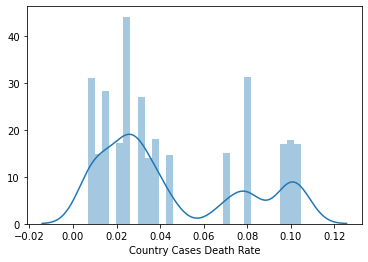

In [42]:
# Use a histogram to visualize the distribution of the variables to help determine the best categories

sns.distplot(df_merged['Country Cases Death Rate'], bins = 30)

In [43]:
df_merged['Country Cases Death Rate']

0       0.038662
1       0.038662
2       0.038662
3       0.038662
4       0.038662
          ...   
3073    0.023522
3074    0.023522
3075    0.023522
3076    0.023522
3077    0.023522
Name: Country Cases Death Rate, Length: 3078, dtype: float64

In [44]:
df_merged.loc[df_merged['Country Cases Death Rate'] < 0.02, 'country_flag'] = 'Lower Death Rate'

In [45]:
df_merged.loc[(df_merged['Country Cases Death Rate'] > 0.02) & (df_merged['Country Cases Death Rate'] < 0.04), 'country_flag'] = 'Medium Death Rate'

In [46]:
df_merged.loc[df_merged['Country Cases Death Rate'] > 0.04, 'country_flag'] = 'High Death Rate'

In [47]:
df_merged['country_flag'].value_counts(dropna = False)

Medium Death Rate    1205
High Death Rate      1131
Lower Death Rate      742
Name: country_flag, dtype: int64

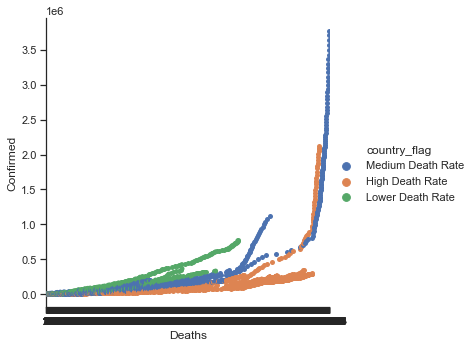

In [48]:
# Create a categorical plot in seaborn using the categories created above

sns.set(style="ticks")
g = sns.catplot(x="Deaths", y="Confirmed", hue="country_flag", data=df_merged)

In [49]:
# Question 6: I can see that the United States is lucky to have a medium death rate
# or else they would have an even worse problem with deaths since they have almost
# double every other country in confirmed cases.  The country (or countries) in orange
# have the highest death rate, having almost as many deaths as the US despite having 
# about half of the cases that the US has.  The green lines show that even as countries
# start to rise in cases, it doesn't automatically mean a high amount of death.   

In [50]:
# Questions 7 and 8 When did the virus begin? In January 2020
# Clarifying Questions:
# -Where did the virus spread to? Answer: All over the world based on the regions
# -Where has the virus had higher death rates?  Answer: Europe followed by the Americas
# -How long did it take to spread? Answer: Hit 24 countries by the end of January, 61 
# countries by the end of February, 100 countries by early-mid March, settled in 187
# countries by May.
 
# Adjoining and Funnelling Questions:
# -Where has the virus had higher death rates?/ Which country has the highest?
# Answer: France is highest at 15.494% 
# of cases resulting in death.  England has 15.063% followed by Italy at 14.120%.
# Definitely see a higher death rate in European countries.
# -What regions were hit the hardest in the first wave? Answer: China obviously (the origin)
# they were the only one through late Feb. to have significant numbers...it was followed
# by South Korea and then Italy right at the beginning of March.
# 
# In order to narrow down the hypothesis, I will need to explore the data deeper. 
# I need to further explore the "Date" aspect, and compare more based on region to
# come up with a better hypothesis.  Quite simply what I will be trying to show is that
# countries with more testing tend to have lower death rates, and countries with stricter
# mask guidelines and shutdowns have kept the virus at a much lower rate.

# Grouping the data to look at different stats (Extra)

In [51]:
path2 = df_merged.groupby('WHO Region_x').agg({'Deaths': ['mean'], 'Confirmed': ['mean'], 'Total Cases': ['mean'], 'Total Deaths': ['mean'], 'Population': ['mean']})

In [52]:
# Checking the comparison between Deaths, Confirmed and Recovered by region.

path2

,Deaths,Confirmed,Total Cases,Total Deaths,Population
,mean,mean,mean,mean,mean
WHO Region_x,,,,,
Africa,967.671533,57344.226277,5.381840e+05,9604.000000,5.938157e+07
Americas,15174.678328,307039.450923,1.549776e+06,55773.328474,1.260546e+08
Eastern Mediterranean,2752.098174,86755.125571,2.958937e+05,9226.397260,1.140942e+08
Europe,12346.143102,144322.837189,3.498157e+05,24910.368466,7.901027e+07
South-East Asia,3129.403909,122459.723127,1.244538e+06,24781.908795,8.464048e+08


In [53]:
# I can see that in terms of death rates, Europe is at nearly 10% which is the worst
# in the world.  The Americas sit at about 5% while the rest of the world is at a very
# low rate.  

In [54]:
df_merged.to_csv(os.path.join(path, '02 Data','Prepared Data', 'full_grouped_edit3.csv')) 